In [51]:
import pandas as pd
import numpy as np

import statsmodels.api as sm


In [52]:
import yfinance as yf



In [54]:
import subprocess
import sys
subprocess.check_call([sys.executable, "-m", "pip", "install", "--quiet", "yfinance", "pandas", "requests"])





0

In [55]:
import yfinance as yf
import pandas as pd

ftse = yf.download("^FTSE", start="2013-01-01", end="2023-12-31")
ftse.reset_index(inplace=True)
ftse.to_csv("ftse_daily.csv", index=False)



[*********************100%***********************]  1 of 1 completed


In [56]:
stocks = ["BARC.L", "HSBA.L", "BP.L", "RDSA.L"]
import yfinance as yf
sector_data = yf.download(stocks, start="2013-01-01", end="2023-12-31")["Close"]
sector_data.reset_index(inplace=True)
sector_data.to_csv("sector_stocks.csv", index=False)
import yfinance as yf
sector_data = yf.download(stocks, start="2013-01-01", end="2023-12-31")["Close"]
sector_data.reset_index(inplace=True)
sector_data.to_csv("sector_stocks.csv", index=False)


[*********************100%***********************]  4 of 4 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RDSA.L']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  4 of 4 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RDSA.L']: YFTzMissingError('possibly delisted; no timezone found')


In [57]:
stock_data = yf.download(
    ["BARC.L", "HSBA.L", "BP.L", "SHEL.L"],
    start="2013-01-01",
    end="2021-12-31"  # Before delisting
)["Close"]


[*********************100%***********************]  4 of 4 completed


In [58]:
import os
print(os.listdir())  # List all files in current directory

['.config', 'Bank Rate history and data  Bank of England Database.csv', 'sector_stocks.csv', 'ftse_daily.csv', 'sample_data']


In [59]:
import yfinance as yf
import pandas as pd

# Download data
stock_data = yf.download(
    ["BARC.L", "HSBA.L", "BP.L", "SHEL.L"],
    start="2013-01-01",
    end="2021-12-31"
)["Close"]

# Save to CSV
stock_data.to_csv("sector_stocks.csv")  # Saves to Colab's temporary storage

[*********************100%***********************]  4 of 4 completed


In [60]:
!pip install yfinance quandl


In [61]:
import quandl

In [62]:
tickers = ["HSBA.L", "BP.L", "SHEL.L"]
start_date = "2013-01-01"
end_date = "2023-12-31"

stock_data = yf.download(tickers, start=start_date, end=end_date)["Close"]
stock_data = stock_data.dropna()
stock_data.tail()


[*********************100%***********************]  3 of 3 completed


Ticker,BP.L,HSBA.L,SHEL.L
Date,,,
2023-12-21,465.978668,621.980164,2556.086914
2023-12-22,466.928101,627.275757,2565.583496
2023-12-27,466.928101,630.972717,2555.087402
2023-12-28,464.929291,631.072632,2548.089844
2023-12-29,465.878693,634.969360,2570.581543


In [64]:
print(df.columns)


Index(['Currency', '£1  09 Jun 2025', '£1 52 wk-high', '£1 52 wk-low'], dtype='object')


In [65]:
bank_rate = pd.read_csv("/content/Bank Rate history and data  Bank of England Database.csv")

In [66]:
bank_rate.head()

,Date Changed,Rate
0,08 May 25,4.25
1,06 Feb 25,4.50
2,07 Nov 24,4.75
3,01 Aug 24,5.00
4,03 Aug 23,5.25


In [67]:
bank_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date Changed  256 non-null    object 
 1   Rate          256 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [68]:
# Rename column for convenience
bank_rate.columns = ['Date', 'Rate']

# Convert Date column to datetime
bank_rate['Date'] = pd.to_datetime(bank_rate['Date'], dayfirst=True)


<ipython-input-68-621607046>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank_rate['Date'] = pd.to_datetime(bank_rate['Date'], dayfirst=True)


In [69]:
# Filter the time range
filtered_rate = bank_rate[(bank_rate['Date'] >= '2013-01-01') & (bank_rate['Date'] <= '2023-12-31')]

# Sort by date and resample to daily frequency
boe_daily = filtered_rate.set_index('Date').resample('D').ffill()


In [70]:
import yfinance as yf

tickers = ["HSBA.L", "BP.L", "SHEL.L"]
start_date = "2013-01-01"
end_date = "2023-12-31"

stock_data = yf.download(tickers, start=start_date, end=end_date)["Close"].dropna()


[*********************100%***********************]  3 of 3 completed


In [71]:
# Join interest rate to stock prices
combined = stock_data.join(boe_daily, how='inner')

# Rename for clarity
combined.rename(columns={"Rate": "BOE_Base_Rate"}, inplace=True)

combined.tail()


,BP.L,HSBA.L,SHEL.L,BOE_Base_Rate
Date,,,,
2023-07-28,475.010925,646.094238,2340.178467,5.00
2023-07-31,482.604706,645.594727,2364.665039,5.00
2023-08-01,481.355713,654.185486,2350.172852,5.00
2023-08-02,473.212402,636.205078,2317.191162,5.00
2023-08-03,477.458954,638.502563,2337.679688,5.25


### Calculate Cumulative abnormal returns

In [72]:
import datetime as dt

# Define tickers
stocks = ["HSBA.L", "BP.L", "SHEL.L"]
market_index = "^FTSE"  # FTSE 100

# Define event date and windows
event_date = pd.to_datetime("2020-03-11")  # example: March 11, 2020 (COVID declared pandemic)
estimation_days = 100
event_window = 5  # 5 days before and after

start_date = (event_date - pd.Timedelta(days=estimation_days + event_window + 5)).strftime("%Y-%m-%d")
end_date = (event_date + pd.Timedelta(days=event_window + 5)).strftime("%Y-%m-%d")

# Download prices
data = yf.download(stocks + [market_index], start=start_date, end=end_date)["Close"]
data = data.dropna()


[*********************100%***********************]  4 of 4 completed


In [73]:
# Calculating daily returns
returns = data.pct_change().dropna()
returns.columns.name = None


In [74]:
car_results = {}

for stock in stocks:
    # Estimation window
    estimation_mask = (returns.index < event_date) & (returns.index >= event_date - pd.Timedelta(days=estimation_days))
    X = returns.loc[estimation_mask, market_index]
    y = returns.loc[estimation_mask, stock]

    # OLS Regression: Ri = alpha + beta*Rm
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Event window
    event_mask = (returns.index >= event_date - pd.Timedelta(days=event_window)) & \
                 (returns.index <= event_date + pd.Timedelta(days=event_window))

    X_event = sm.add_constant(returns.loc[event_mask, market_index])
    actual_returns = returns.loc[event_mask, stock]
    expected_returns = model.predict(X_event)
    abnormal_returns = actual_returns - expected_returns
    car = abnormal_returns.cumsum()

    car_results[stock] = {
        'abnormal_returns': abnormal_returns,
        'CAR': car,
        'dates': abnormal_returns.index
    }


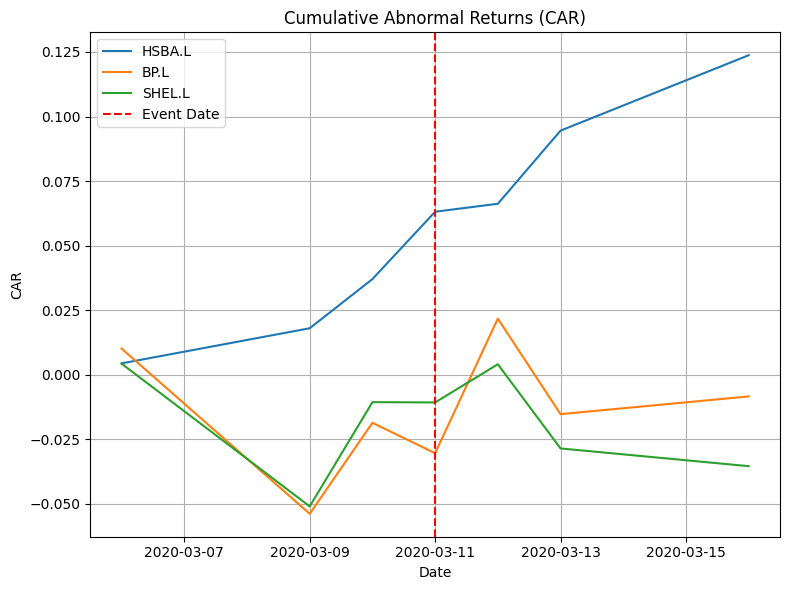

In [75]:
plt.figure(figsize=(8, 6))

for stock in stocks:
    plt.plot(car_results[stock]['dates'], car_results[stock]['CAR'], label=stock)

plt.axvline(event_date, color='red', linestyle='--', label='Event Date')
plt.title("Cumulative Abnormal Returns (CAR)")
plt.xlabel("Date")
plt.ylabel("CAR")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Exploratory data analysis

In [76]:

# Calculate daily log returns for each stock
log_returns = np.log(stock_data / stock_data.shift(1)).dropna()

log_returns.head()


Ticker,BP.L,HSBA.L,SHEL.L
Date,,,
2013-01-03,0.023827,-0.004819,0.007272
2013-01-04,0.026364,0.007669,0.007221
2013-01-07,-0.010529,-0.002099,-0.006285
2013-01-08,0.000446,-0.010563,-0.004213
2013-01-09,0.021376,0.016101,0.004213


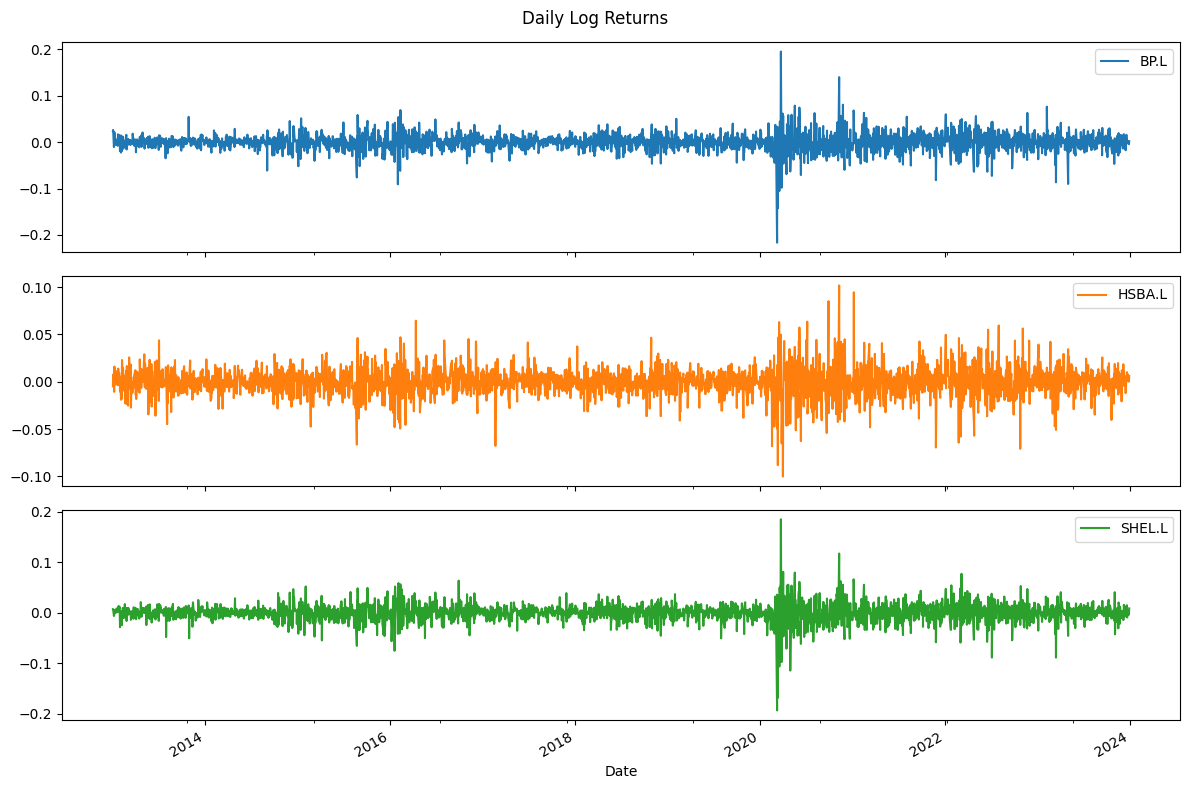

In [77]:
import matplotlib.pyplot as plt

log_returns.plot(subplots=True, figsize=(12, 8), title="Daily Log Returns")
plt.tight_layout()
plt.show()


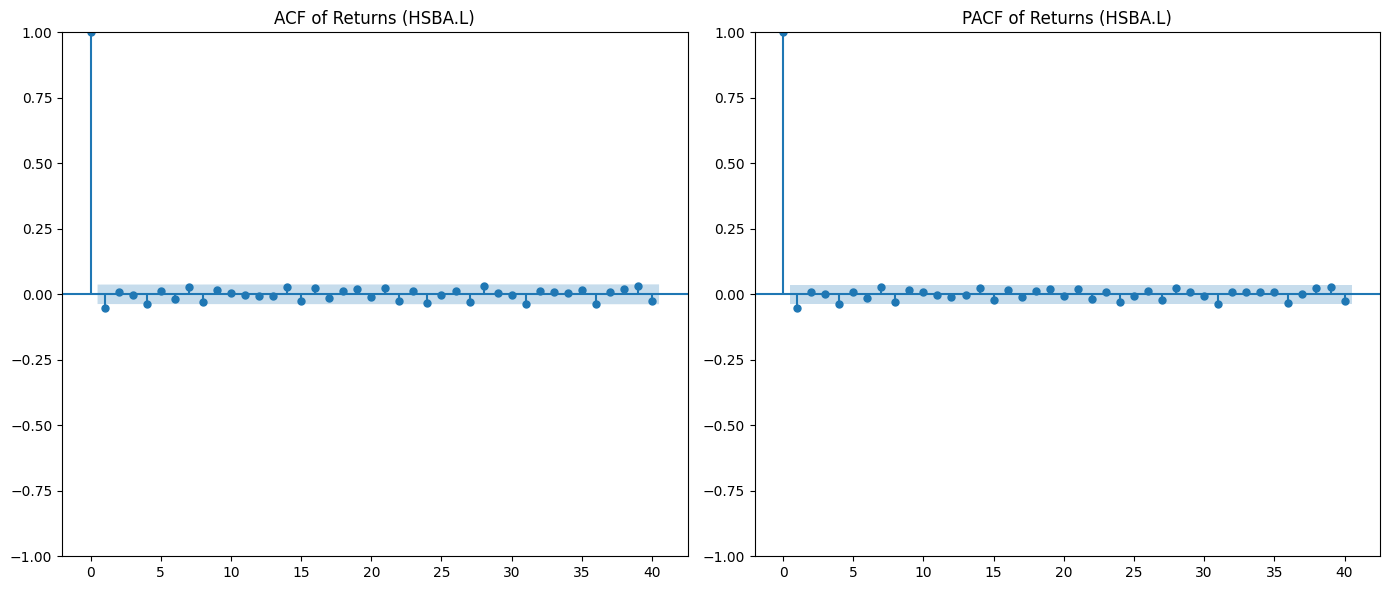

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for log returns
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(log_returns['HSBA.L'], lags=40, ax=plt.gca(), title='ACF of Returns (HSBA.L)')

plt.subplot(1, 2, 2)
plot_pacf(log_returns['HSBA.L'], lags=40, ax=plt.gca(), title='PACF of Returns (HSBA.L)')

plt.tight_layout()
plt.show()


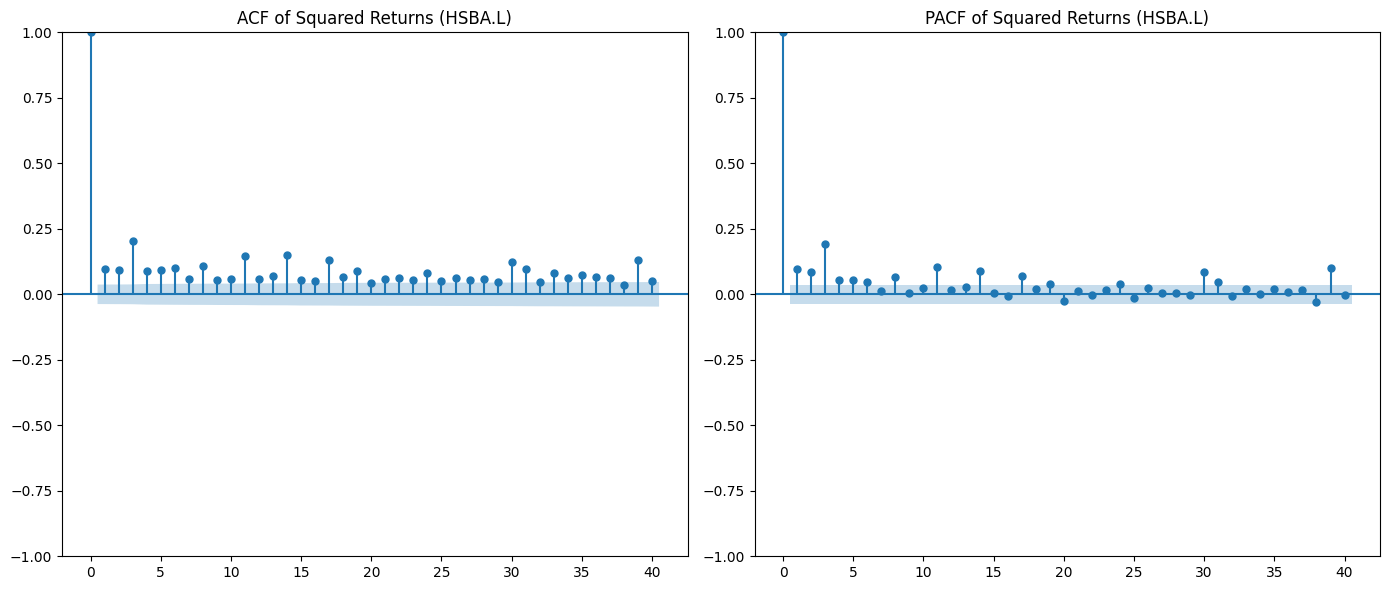

In [78]:
# Squared returns
squared_returns = log_returns['HSBA.L'] ** 2

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(squared_returns, lags=40, ax=plt.gca(), title='ACF of Squared Returns (HSBA.L)')

plt.subplot(1, 2, 2)
plot_pacf(squared_returns, lags=40, ax=plt.gca(), title='PACF of Squared Returns (HSBA.L)')

plt.tight_layout()
plt.show()


In [79]:
!pip install arch


In [80]:
from arch import arch_model

# Use HSBA.L log returns
returns = log_returns['HSBA.L'] * 100
# Drop missing values if any
returns = returns.dropna()


In [81]:
# Fit GARCH(1,1)
model = arch_model(returns, vol='GARCH', p=1, q=1, mean='Zero', dist='normal')
garch_fit = model.fit(disp='off')

# Summary
print(garch_fit.summary())


                       Zero Mean - GARCH Model Results                        
Dep. Variable:                 HSBA.L   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4834.32
Distribution:                  Normal   AIC:                           9674.65
Method:            Maximum Likelihood   BIC:                           9692.44
                                        No. Observations:                 2777
Date:                Wed, Jun 11 2025   Df Residuals:                     2777
Time:                        09:01:40   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0155  7.737e-03      2.003  4.515e-02 [3.

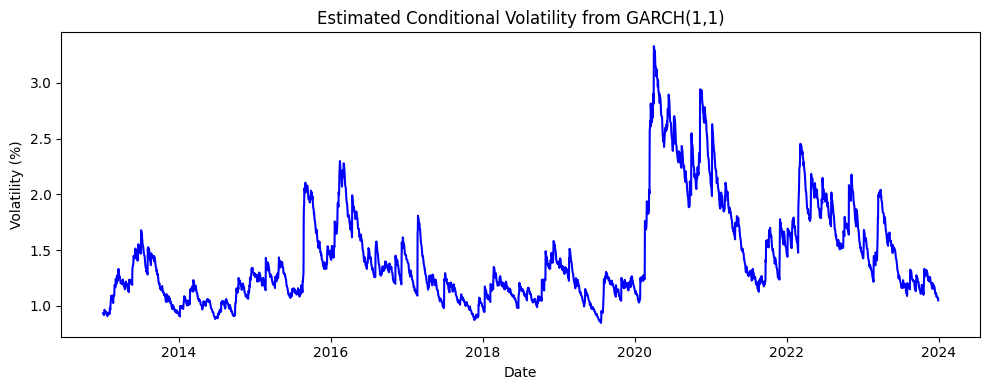

In [82]:
# Plot conditional volatility
plt.figure(figsize=(10, 4))
plt.plot(garch_fit.conditional_volatility, color='blue')
plt.title('Estimated Conditional Volatility from GARCH(1,1)')
plt.ylabel('Volatility (%)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [83]:
# Forecast next 5 days
forecast = garch_fit.forecast(horizon=5)
print(forecast.variance[-1:])


                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2023-12-29  1.082476  1.090587  1.098642  1.106643  1.114588


### Comparing the GARCH model for 3 returns

In [84]:
from arch import arch_model

# Multiply log returns by 100 for modeling
returns_scaled = log_returns * 100


In [85]:
results = {}

for ticker in returns_scaled.columns:
    print(f"Fitting GARCH(1,1) for {ticker}...")
    model = arch_model(returns_scaled[ticker].dropna(), vol='GARCH', p=1, q=1, mean='Zero', dist='normal')
    fit = model.fit(disp='off')
    results[ticker] = fit


Fitting GARCH(1,1) for BP.L...
Fitting GARCH(1,1) for HSBA.L...
Fitting GARCH(1,1) for SHEL.L...


In [86]:
for ticker, fit in results.items():
    params = fit.params
    print(f"\n=== {ticker} ===")
    print(f"omega: {params['omega']:.4f}")
    print(f"alpha (ARCH): {params['alpha[1]']:.4f}")
    print(f"beta (GARCH): {params['beta[1]']:.4f}")
    print(f"Log-Likelihood: {fit.loglikelihood:.2f}")
    print(f"AIC: {fit.aic:.2f} | BIC: {fit.bic:.2f}")
    print(f"Volatility Persistence (alpha + beta): {params['alpha[1]'] + params['beta[1]']:.4f}")



=== BP.L ===
omega: 0.0280
alpha (ARCH): 0.0599
beta (GARCH): 0.9334
Log-Likelihood: -5247.32
AIC: 10500.65 | BIC: 10518.44
Volatility Persistence (alpha + beta): 0.9934

=== HSBA.L ===
omega: 0.0155
alpha (ARCH): 0.0349
beta (GARCH): 0.9583
Log-Likelihood: -4834.32
AIC: 9674.65 | BIC: 9692.44
Volatility Persistence (alpha + beta): 0.9932

=== SHEL.L ===
omega: 0.0375
alpha (ARCH): 0.0834
beta (GARCH): 0.9067
Log-Likelihood: -5068.09
AIC: 10142.18 | BIC: 10159.96
Volatility Persistence (alpha + beta): 0.9901


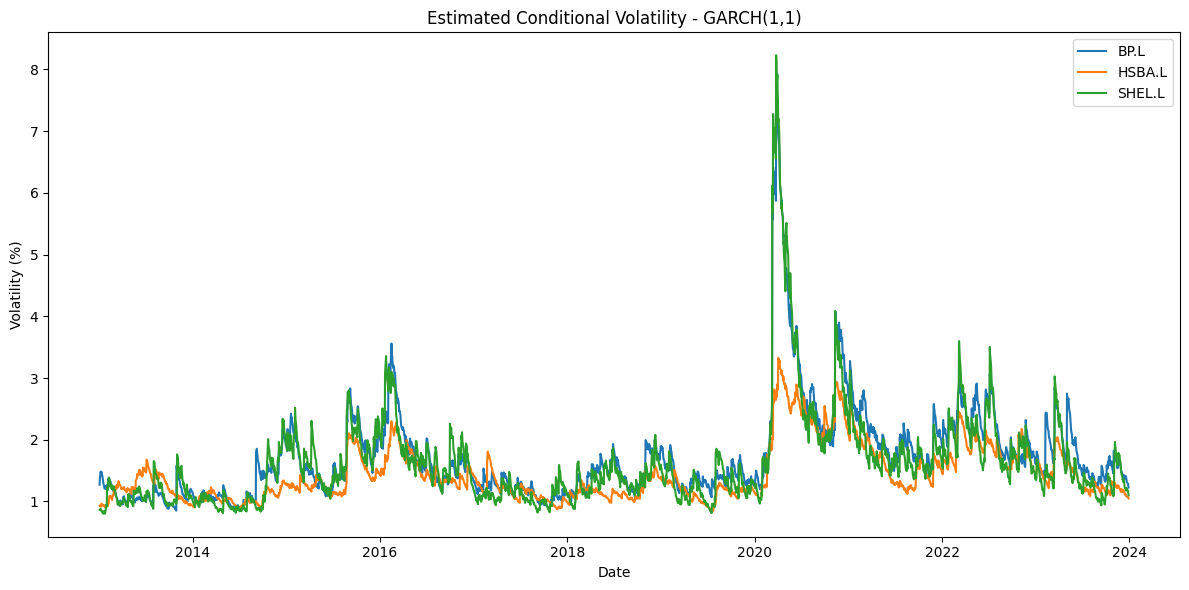

In [ ]:
plt.figure(figsize=(12, 6))

for ticker, fit in results.items():
    plt.plot(fit.conditional_volatility, label=ticker)

plt.title("Estimated Conditional Volatility - GARCH(1,1)")
plt.ylabel("Volatility (%)")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()
